## Predicción de enfermos con cáncer

Una de las aplicaciones más interesantes de los algoritmos de machine learning es la capacidad de detectar enfermedades y factores de riesgo. Una de las enfermedades más importantes es el cáncer, en el siguiente ejemplo vamos a aplicar varios modelos de regresión logística con el objetivo de clasificar de la mejor manera posible pacientes que sufren tumores benignos y malignos. <p> <p>
La base de datos proviene de la plataforma ''Kaggle''. Su titulo es *Wisconsin Diagnostic Breast Cancer* y consta de 569 pacientes a los cuales se les han medido 30 variables reales. El objetivo es conseguir clasificar el tipo de tumor que sufren nuevos pacientes, el data set tiene 357 con un tumor benigno y 212 con un tumor maligno. <p>
Información sobre los datos en : <p>
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names<p> <p>
Se utilizará la metodología propuesta en el trabajo de fin de grado.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve

Tomo como $y=1$ la diagnosis de un tumor maligno, $y=0$ la diagnosis de tumor benigno.

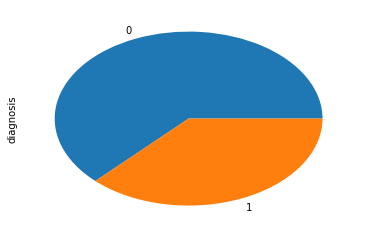

In [2]:
data = pd.read_csv('data/cancer.csv').set_index('id').iloc[:, :-1]
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.diagnosis.value_counts().plot(kind='pie')
plt.show()

In [3]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Primero divido la muestra en entrenamiento, validación y test con proporcion (60/20/20) <p>
Estandarizo todas las variables según la distribución de la muestra de entrenamiento dado que voy a aplicar regularización.

In [4]:
train, validate, test = np.split(data.sample(frac=1, random_state=42),
                                 [int(.6*len(data)), int(.8*len(data))])

X_train = np.array(train.iloc[:, 1:])
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
y_train = np.array(train['diagnosis'])
X_validate = scaler.transform(np.array(validate.iloc[:, 1:]))
y_validate = np.array(validate['diagnosis'])
X_test = scaler.transform(np.array(test.iloc[:, 1::]))
y_test = np.array(test['diagnosis'])

Calculo distintos modelos variando el parámetro de regularización C. <p>
Calculo para la Accuracy para mis tres particiones en los datos.<p>
Calculo la sensibilidad, precisión y especificidad de cada modelo con el test set.

In [5]:
# Parámetros de regularización
list_C = [0.00001, 0.0001, 0.001, 0.01, 0.2, 0.5, 1, 5, 10, 100]
# Métricas
score_train = np.zeros(len(list_C))
score_val = np.zeros(len(list_C))
score_test = np.zeros(len(list_C)) 
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
# Models
count = 0
for C in list_C:
    reg = LogisticRegression(C=C)
    reg.fit(X_train, y_train)
    score_train[count]= accuracy_score(y_train, reg.predict(X_train))
    score_val[count] = accuracy_score(y_validate, reg.predict(X_validate))
    score_test[count] = accuracy_score(y_test, reg.predict(X_test))
    recall_test[count] = recall_score(y_test, reg.predict(X_test))
    precision_test[count] = precision_score(y_test, reg.predict(X_test))
    count = count + 1 

Creo un data frame para cada modelo de regresión logística utilizado. <p>
Cada modelo tiene distinto parámetro C, muestro la accuracy de los 5 primeros modelos.

In [6]:
matrix = np.matrix(np.c_[list_C, score_train, score_val, 
                         score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Validation Accuracy', 
              'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=5)

,C,Train Accuracy,Validation Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.935484,0.912281,0.947368,0.914894,0.955556
1,0.00010,0.938416,0.912281,0.947368,0.914894,0.955556
2,0.00100,0.944282,0.938596,0.947368,0.914894,0.955556
3,0.01000,0.976540,0.964912,0.938596,0.893617,0.954545
4,0.20000,0.988270,0.982456,0.947368,0.893617,0.976744


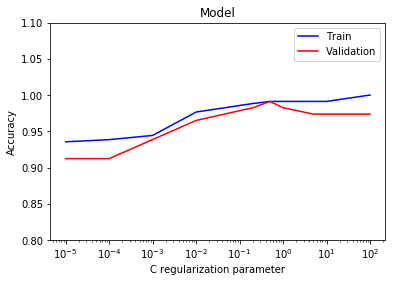

In [7]:
plt.plot(list_C, models['Train Accuracy'], color = 'blue')
plt.plot(list_C, models['Validation Accuracy'], color = 'red')
plt.legend(['Train', 'Validation'])
plt.title('Model')
plt.xlabel('C regularization parameter')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.1, 0.01)
plt.xscale('log')
plt.show()

Elijo el mejor modelo en función de la Accuracy en el validate test. Observo el resto de métricas.

In [8]:
best_index = models['Validation Accuracy'].idxmax()
models.iloc[best_index, :]

C                      0.500000
Train Accuracy         0.991202
Validation Accuracy    0.991228
Test Accuracy          0.956140
Test Recall            0.914894
Test Precision         0.977273
Name: 5, dtype: float64

El modelo lo hemos elegido tomando como parámetro el validate set. <p>
La manera correcta de estimar la capacidad de generalización es evaluarla sobre el test set. <p>
Si lo hicieramos sobre el validate test, sobreestimariamos su capacidad al haberlo tomado como parámetro al elegir el modelo.

In [9]:
reg = LogisticRegression(C=list_C[best_index])
reg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Matriz de confusión evaluada en el **train set**

In [10]:
m_confusion_train = confusion_matrix(y_train,
                         reg.predict(X_train))
pd.DataFrame(data = m_confusion_train, 
            columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,218,0
Actual 1,3,120


Matriz de confusión evaluada en el **validation set**

In [11]:
m_confusion_validate = confusion_matrix(y_validate,
                         reg.predict(X_validate))
pd.DataFrame(data = m_confusion_validate, 
            columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,72,0
Actual 1,1,41


Matriz de confusión evaluada en el **test set**

In [12]:
m_confusion_test = confusion_matrix(y_test,
                         reg.predict(X_test))
pd.DataFrame(data = m_confusion_test, 
             columns = ['Predicted 0', 'Predicted 1'],
             index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,66,1
Actual 1,4,43


Observo sobre mi modelo que el error de generalización está sobre estimado si lo evaluo sobre el conjunto de validación <p>
Esto es debido a que la elección del parámetro de regularización está sujeta a él.
#### Mi precisión al generalizar es aproximadamente un 95%.

#### Interpretamos como afectan las variables al tipo de tumor

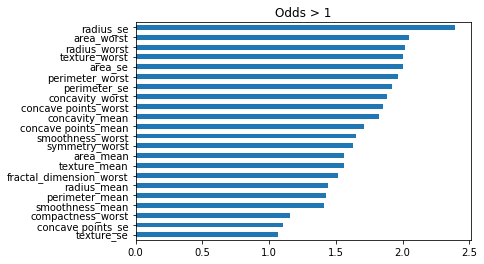

In [13]:
odds = pd.Series(np.exp(reg.coef_).ravel(), index = data.columns[1:])
odds[odds>1].sort_values().plot(kind='barh')
plt.title('Odds > 1')
plt.show()

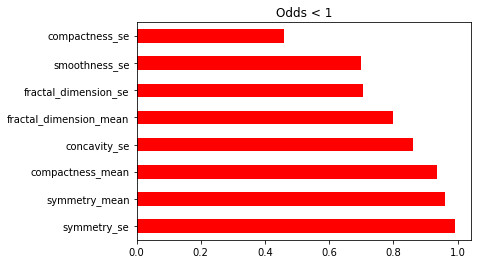

In [14]:
odds[odds<1].sort_values(ascending = False).plot(kind='barh', color = 'r')
plt.title('Odds < 1')
plt.show()